<a href="https://colab.research.google.com/github/milioe/Moravec/blob/main/3_ComputerVision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks and Computer Vision with TF

* [`Pizza link`](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)

* [`10 food all classes`](10_food_classes_all_data)

What we are going to cover:
* Getting a dataset
* Architecture of Convolutional Neural Network
* Quick end-to-end example
* Steps in modelling for binary image classification
  * Preparing data
  * Creating CNN Architecture
  * Fitting a model
  * Evaluating a model
  * Improving a model
  * Making a prediction
* Steps in modelling for multi-class image classification


# Getting data

We take a preprocessed dataset taken from [`Food 101 image dataset`](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)

In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-06-25 21:29:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   238MB/s    in 0.4s    

2022-06-25 21:29:32 (238 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls 

pizza_steak  pizza_steak.zip  sample_data


In [5]:
!ls pizza_steak/

test  train


In [6]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [7]:
import os # move through os system or files
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [9]:
# View images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0]) # target_folder/test/00001.jpg
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img



Image shape: (512, 512, 3)


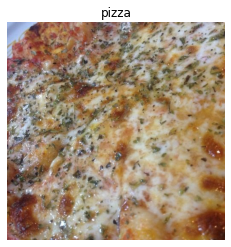

In [10]:
img = view_random(target_dir="pizza_steak/train/",
                  target_class="pizza")

In [11]:
img

array([[[159, 181, 228],
        [160, 182, 229],
        [160, 182, 229],
        ...,
        [170, 153, 137],
        [220, 201, 184],
        [229, 211, 191]],

       [[164, 185, 232],
        [163, 185, 232],
        [163, 185, 232],
        ...,
        [197, 180, 164],
        [222, 204, 184],
        [209, 191, 169]],

       [[165, 186, 233],
        [164, 186, 233],
        [164, 186, 233],
        ...,
        [195, 178, 160],
        [186, 169, 149],
        [162, 146, 123]],

       ...,

       [[131,  62,  65],
        [128,  59,  62],
        [126,  55,  59],
        ...,
        [ 62,  24,  13],
        [ 65,  27,  16],
        [ 68,  30,  19]],

       [[136,  69,  76],
        [127,  60,  67],
        [119,  53,  57],
        ...,
        [ 63,  25,  14],
        [ 65,  27,  16],
        [ 67,  29,  18]],

       [[134,  69,  77],
        [137,  72,  80],
        [137,  72,  78],
        ...,
        [ 63,  25,  14],
        [ 64,  26,  15],
        [ 65,  27,  16]]

In [12]:
img/255.0

array([[[0.62352941, 0.70980392, 0.89411765],
        [0.62745098, 0.71372549, 0.89803922],
        [0.62745098, 0.71372549, 0.89803922],
        ...,
        [0.66666667, 0.6       , 0.5372549 ],
        [0.8627451 , 0.78823529, 0.72156863],
        [0.89803922, 0.82745098, 0.74901961]],

       [[0.64313725, 0.7254902 , 0.90980392],
        [0.63921569, 0.7254902 , 0.90980392],
        [0.63921569, 0.7254902 , 0.90980392],
        ...,
        [0.77254902, 0.70588235, 0.64313725],
        [0.87058824, 0.8       , 0.72156863],
        [0.81960784, 0.74901961, 0.6627451 ]],

       [[0.64705882, 0.72941176, 0.91372549],
        [0.64313725, 0.72941176, 0.91372549],
        [0.64313725, 0.72941176, 0.91372549],
        ...,
        [0.76470588, 0.69803922, 0.62745098],
        [0.72941176, 0.6627451 , 0.58431373],
        [0.63529412, 0.57254902, 0.48235294]],

       ...,

       [[0.51372549, 0.24313725, 0.25490196],
        [0.50196078, 0.23137255, 0.24313725],
        [0.49411765, 0

## Resources:
* [CNN Explainer](https://poloclub.github.io/cnn-explainer/)
* [Explained Visually](https://setosa.io/ev/image-kernels/)
* [Food 101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)
* [Distil Pub](https://distill.pub/)
* [A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

🚨 **Baseline_** 50.76% random forest accuracy

## Hyperparameters

* `2D` - means `x`, `y`, two dimensional (height, width), even tough we have 3 color channels
* `kernel_size`- size of our filter 
* `filter` - **feature extractor**
* `stride` - the number of pixels a filter will move across as it covers the image
* `padding` - it can be either `same` or `valid`
  * `same` = adds zeros to the outside
  * `valid` = adds cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel sixe of 3 (224/3=74.6) means a single pixel will get cut off of the end)

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 0. Set random seed
tf.random.set_seed(42)

## IMAGE PREPROCESSING ##
# a. Preprocess data (get all pixels between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# b. Setup train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# c. Import data from directories
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # image pixels
                                               class_mode="binary", # pizza vs steak
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

# 1. Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224,3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


# 2. Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 # any number(:
                        validation_data=valid_data,
                        validation_steps=len(valid_data)) # 16



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 212ms/step - loss: 0.5850 - accuracy: 0.6860 - val_loss: 0.4290 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4301 - accuracy: 0.8047 - val_loss: 0.3691 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 203ms/step - loss: 0.3967 - accuracy: 0.8253 - val_loss: 0.3171 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3615 - accuracy: 0.8447 - val_loss: 0.2996 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3023 - accuracy: 0.8747 - val_loss: 0.2697 - val_accuracy: 0.8860


In [14]:
len(train_data), len(valid_data)

(47, 16)

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [19]:
model_1.evaluate(valid_data)

16/16 [==============================] - 3s 160ms/step - loss: 0.2697 - accuracy: 0.8860


[0.2697051763534546, 0.8859999775886536]